In [46]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [22]:

pip install libpysal 


Note: you may need to restart the kernel to use updated packages.


In [23]:

pip install geoviews 


Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install numpy 


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install pandas 


Note: you may need to restart the kernel to use updated packages.


In [28]:


pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import streamlit as st
import geopandas as gpd
#import libpysal as ps
#import geoviews as gv
#import geoviews.feature as gf
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, Checkbox, Layout
from IPython.display import display

In [2]:
dataset = "data/demographie-exercices-liberaux.csv"               #chemin vers le dataframe
df = pd.read_csv(dataset, sep=';').iloc[:, :11]    #charger seulement les 10 premières colonnes
df.fillna(0, inplace=True)                          # Remplacer toutes les valeurs NaN par 0

In [7]:
df.head() #afficher les lignes du dataset

TypeError: cannot do positional indexing on RangeIndex with these indexers [[False]] of type list

In [4]:
################### Vérifier les types des colonnes du tableau ########################

print(df.dtypes)

annee                            int64
profession_sante                 object
region                            int64
libelle_region                   object
departement                      object
libelle_departement              object
type_exercice_liberal             int64
libelle_type_exercice_liberal    object
effectif                          int64
vision generale all              object
vision_generale_prescriptions    object
dtype: object


In [35]:
#################################################################################
print('#Afficher les effectifs par spécialité et par région')

df_age = df[(df['classe_age'] == 'tout_age') & (df['libelle_sexe'] == 'tout sexe') & (df['departement'] == '999') & (df['region'] != '99')]

#display(df_specialite.head()) # affichage classique

##### affichage par tri sur l'effectif (du plus grand au plus petit)#####
df_tri_specialite = df_age.sort_values(by='profession_sante', ascending=False)
display(df_tri_specialite.head())

#Afficher les effectifs par spécialité et par région


,﻿annee,profession_sante,region,libelle_region,departement,libelle_departement,classe_age,libelle_classe_age,libelle_sexe,effectif,densite
108554,2022,Stomatologues,28,Normandie,999,Tout département,tout_age,Tout âge,tout sexe,40,1.21
27195,2022,Stomatologues,99,FRANCE,999,FRANCE,tout_age,Tout âge,tout sexe,715,1.05
108323,2022,Stomatologues,11,Ile-de-France,999,Tout département,tout_age,Tout âge,tout sexe,187,1.51
24916,2022,Stomatologues,3,Guyane,999,Tout département,tout_age,Tout âge,tout sexe,0,0.00
25221,2022,Stomatologues,27,Bourgogne-Franche-Comté,999,Tout département,tout_age,Tout âge,tout sexe,16,0.57


In [36]:

# Charger le dataset
#dataset = "data/dataset_filrouge.csv"
#df = pd.read_csv(dataset, sep=';')


#Répartition des effectifs par profession de santé libérale


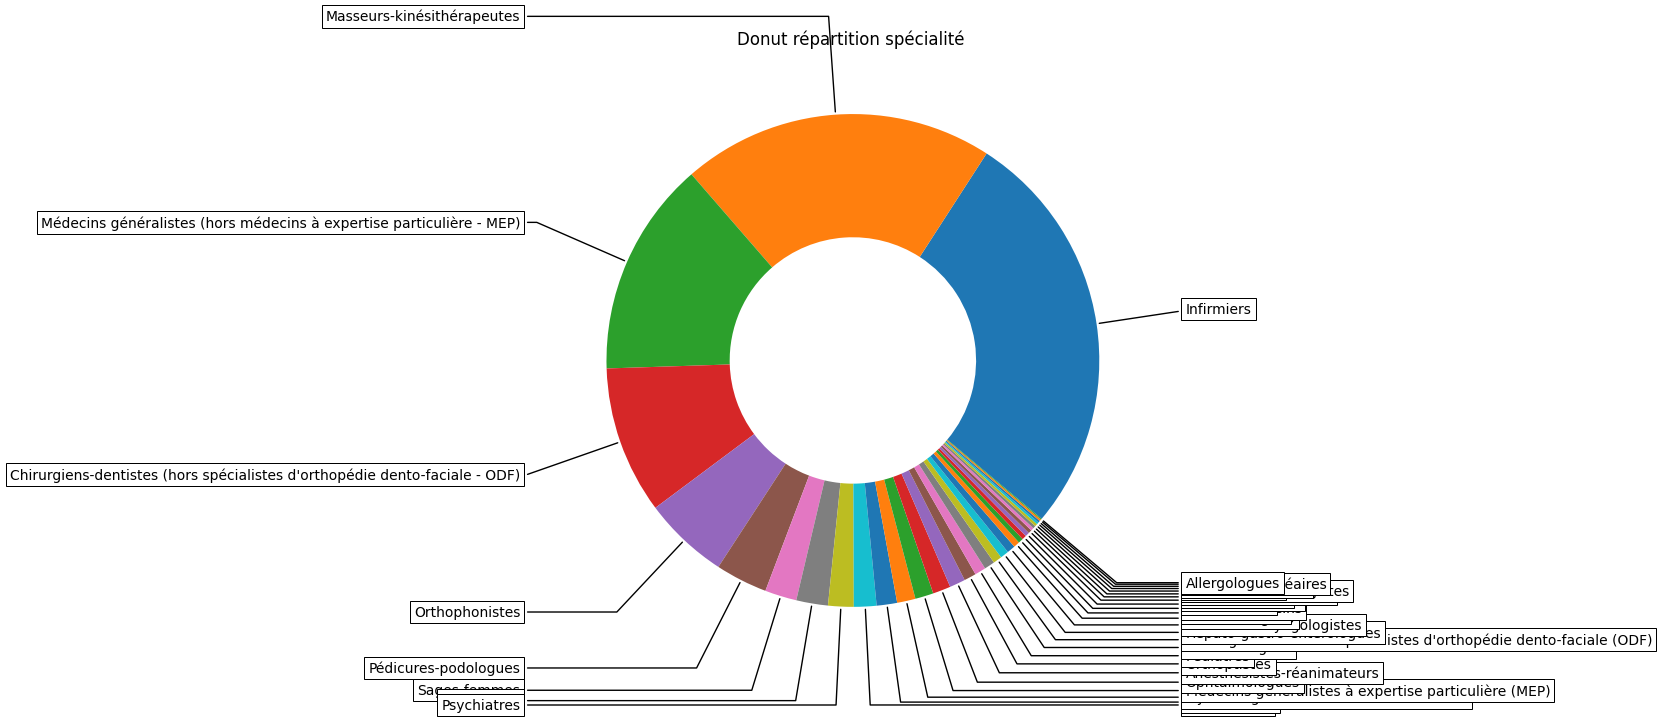

In [37]:
#################################################################################
print('#Répartition des effectifs par profession de santé libérale')
# Filtrer le dataframe selon les conditions spécifiées
df_specialite = df[(df['classe_age'] == 'tout_age') & 
                   (df['libelle_sexe'] == 'tout sexe') & 
                   (df['departement'] == '999') & 
                   (df['libelle_departement'] == 'FRANCE')]


# Exclure les professions contenant le mot "ensemble"
df_specialite = df_specialite[~df_specialite['profession_sante'].str.contains("Ensemble", case=False, na=False)]

# Trier les spécialités par effectif en ordre décroissant
df_tri_specialite = df_specialite.sort_values(by='effectif', ascending=False)

# Préparation des données pour le diagramme circulaire
labels = df_tri_specialite['profession_sante']
sizes = df_tri_specialite['effectif']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Création du diagramme circulaire (donut)
wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40)

# Ajout des annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels.iloc[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Donut répartition spécialité ")

plt.show()


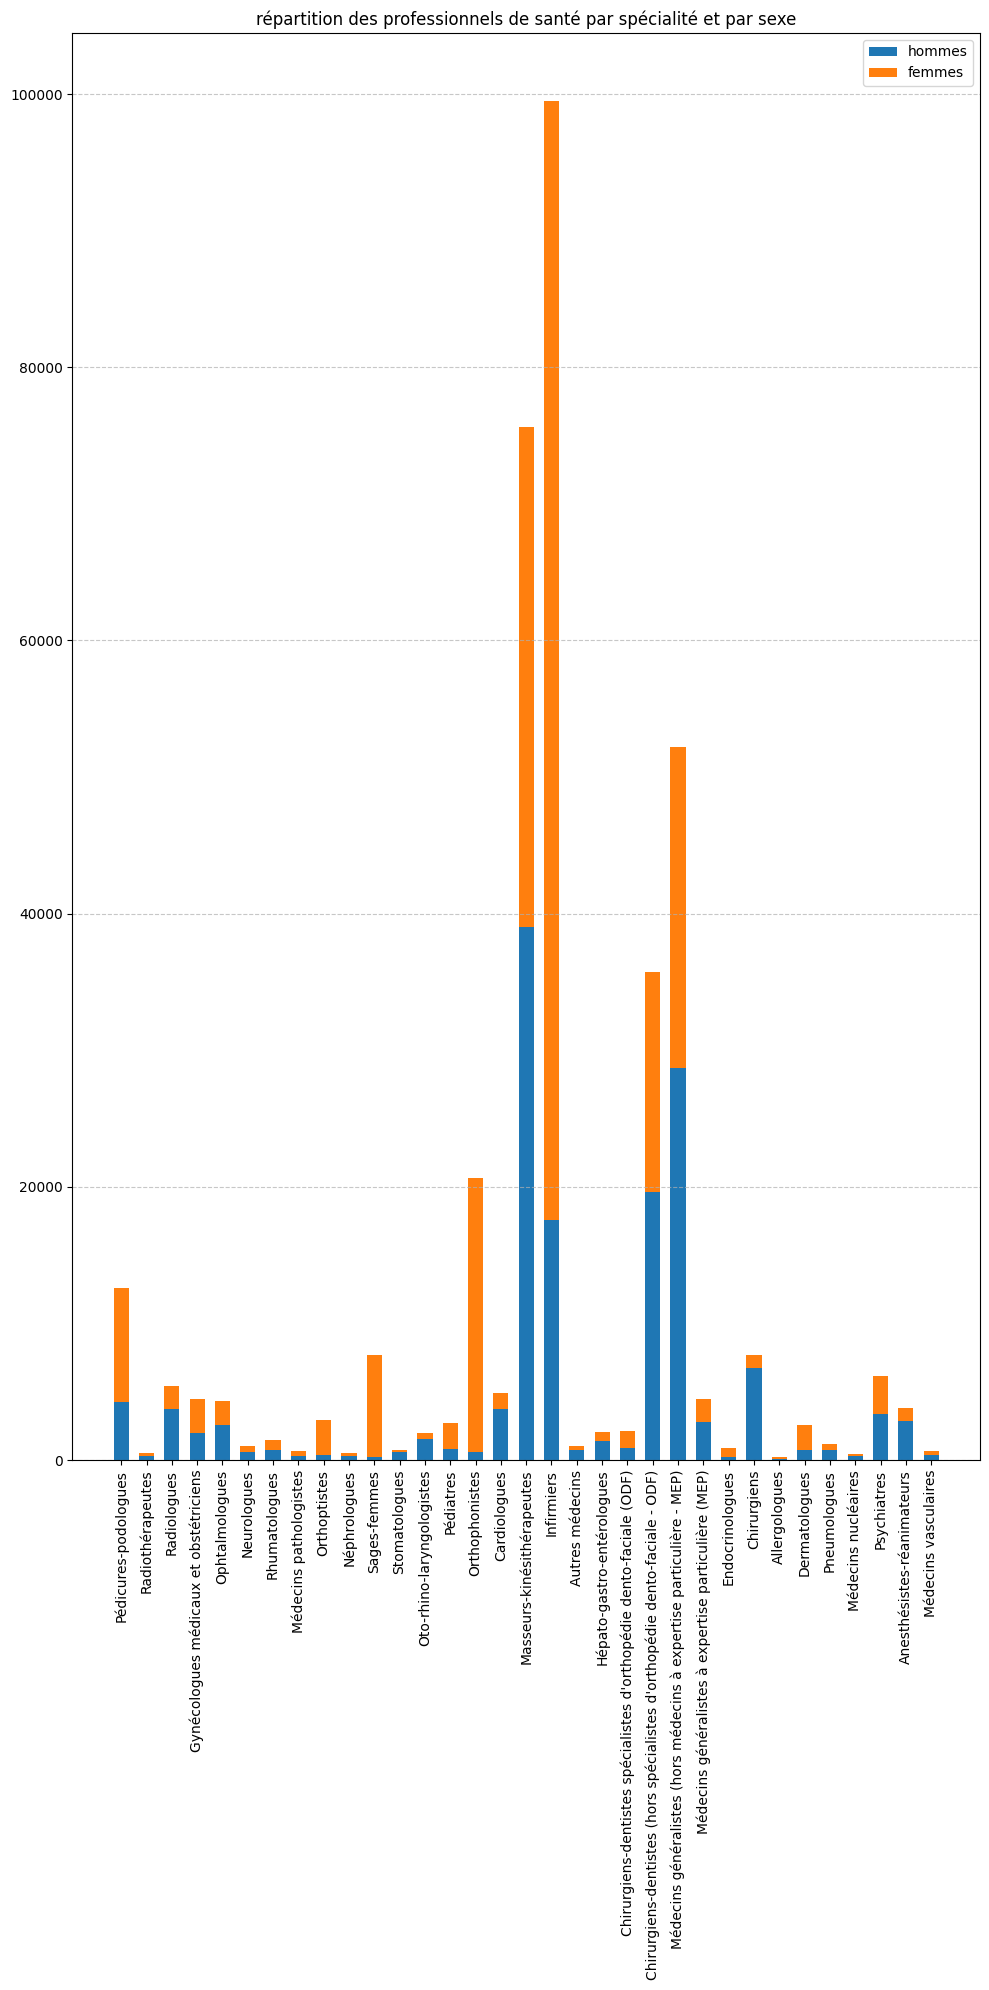

In [38]:
# Filtrer le dataframe selon les conditions spécifiées
df_specialite = df[(df['classe_age'] == 'tout_age') & 
                   (df['departement'] == '999') & 
                   (df['libelle_departement'] == 'FRANCE')]

# Exclure les professions contenant le mot "ensemble"
df_specialite = df_specialite[~df_specialite['profession_sante'].str.contains("ensemble", case=False, na=False)]


# Obtenir les spécialités uniques
species = df_specialite['profession_sante'].unique()

# Initialiser les compteurs pour chaque sexe
sex_counts = {'hommes': [], 'femmes': []}

# Calculer le nombre de professionnels de chaque sexe pour chaque spécialité
for specie in species:
    males = df_specialite[(df_specialite['profession_sante'] == specie) & (df_specialite['libelle_sexe'] == 'hommes')]['effectif'].sum()
    females = df_specialite[(df_specialite['profession_sante'] == specie) & (df_specialite['libelle_sexe'] == 'femmes')]['effectif'].sum()
    sex_counts['hommes'].append(males)
    sex_counts['femmes'].append(females)

# Convertir les listes en arrays numpy
sex_counts['hommes'] = np.array(sex_counts['hommes'])
sex_counts['femmes'] = np.array(sex_counts['femmes'])

# Largeur des barres
width = 0.6

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 20))
bottom = np.zeros(len(species))

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    # Ajouter les annotations sur les barres
    #ax.bar_label(p, label_type='center', rotation=90, padding=5)

ax.set_title('répartition des professionnels de santé par spécialité et par sexe')
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout() #ajuster la position pour éviter les chauvechements
plt.grid(axis='y', linestyle='--', alpha=0.7) #ajouter une grille pour meilleure lisibilité
plt.show()


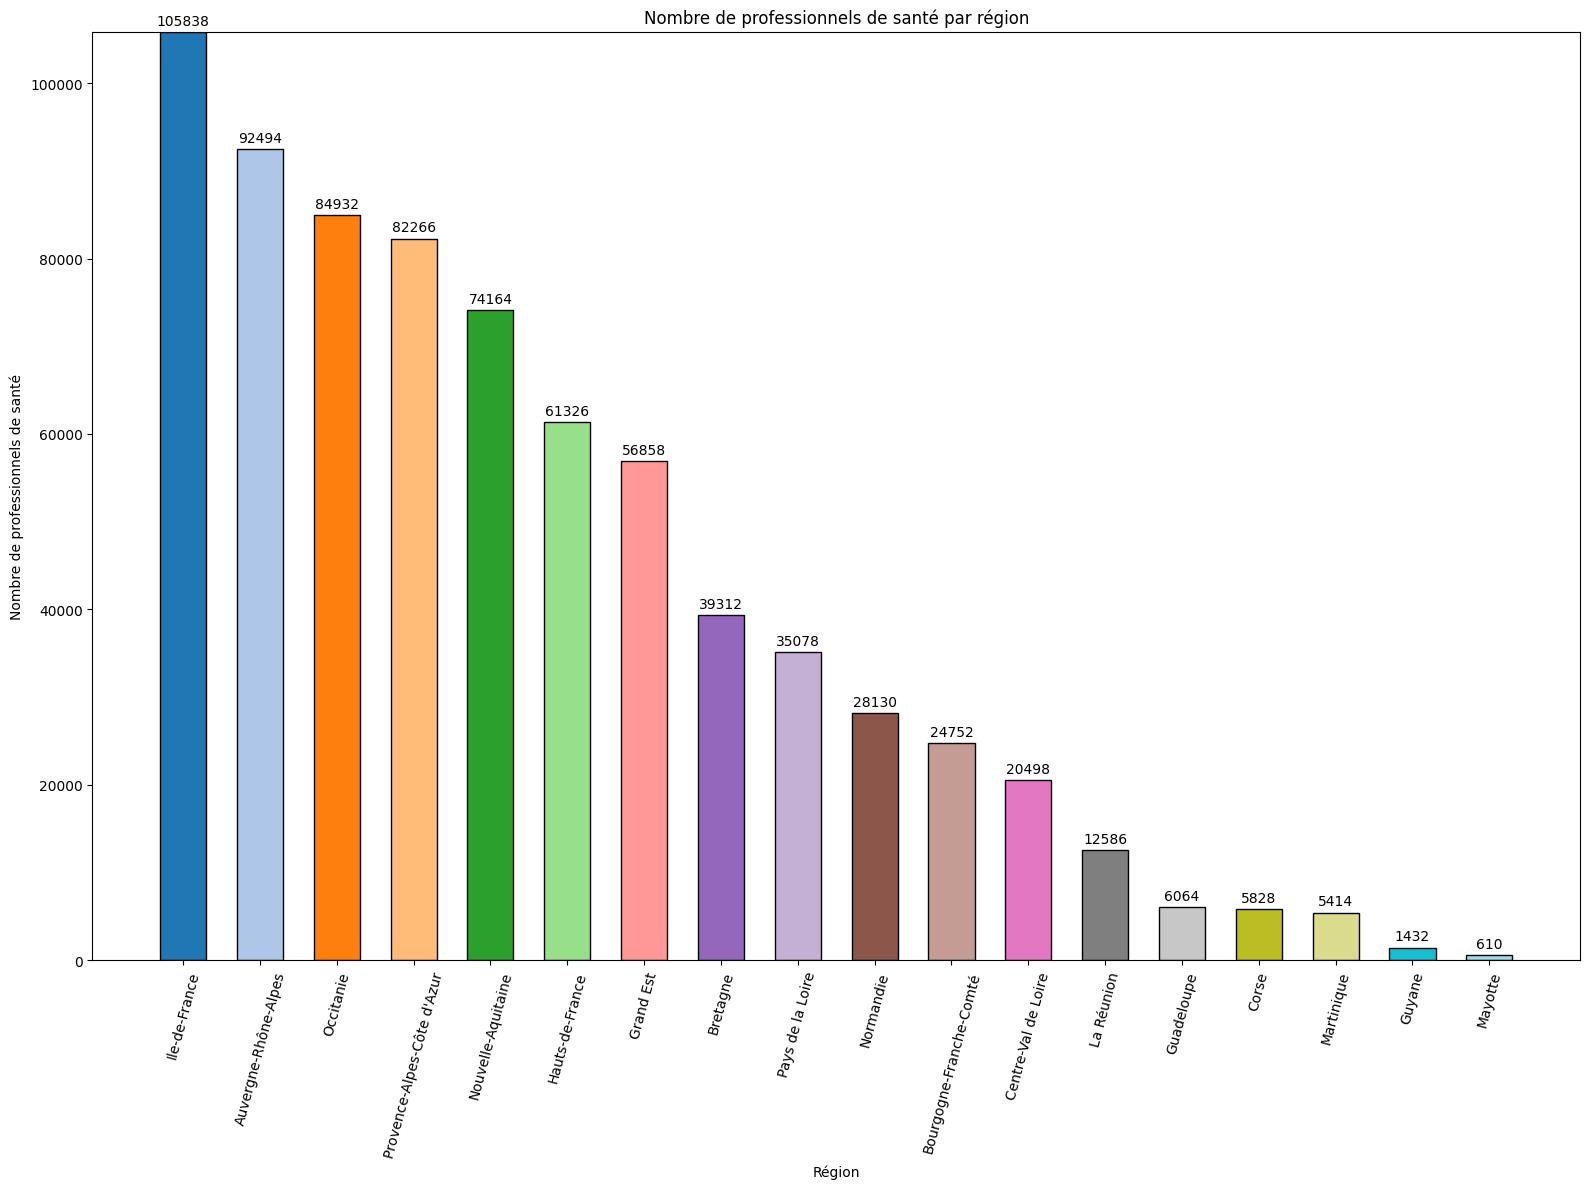

In [39]:

############Nombre de professionnels de santé par région ########################
# Filtrer le dataframe selon les conditions spécifiées
df_filtre = df[(df['classe_age'] == 'tout_age') & 
               #(df['libelle_sexe'] == 'tout sexe') & 
               (df['departement'] == '999') & 
               (df['libelle_departement'] == 'Tout département')]


# Exclure les professions contenant le mot "ensemble"
df_filtre = df_filtre[~df_filtre['profession_sante'].str.contains("ensemble", case=False, na=False)]


# Compter les effectifs par région
region_counts = df_filtre.groupby('libelle_region')['effectif'].sum()

# Trier les régions par ordre décroissant de l'effectif
region_counts = region_counts.sort_values(ascending=False)

# Largeur des barres
width = 0.6

# Définir une palette de couleurs
colors = plt.cm.tab20(np.linspace(0, 1, len(region_counts)))

fig, ax = plt.subplots(figsize=(16, 12))

rects = ax.bar(region_counts.index, region_counts.values, width, color=colors, edgecolor='black')

# Ajouter des labels en haut des barres
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Ajouter des labels, un titre et des labels pour l'axe x
ax.set_xlabel('Région')
ax.set_ylabel('Nombre de professionnels de santé')
ax.set_title('Nombre de professionnels de santé par région')
plt.xticks(rotation=75)
plt.ylim(0, max(region_counts.values) + 10)  # Ajuster la limite supérieure de l'axe y
    
plt.tight_layout()
plt.show()


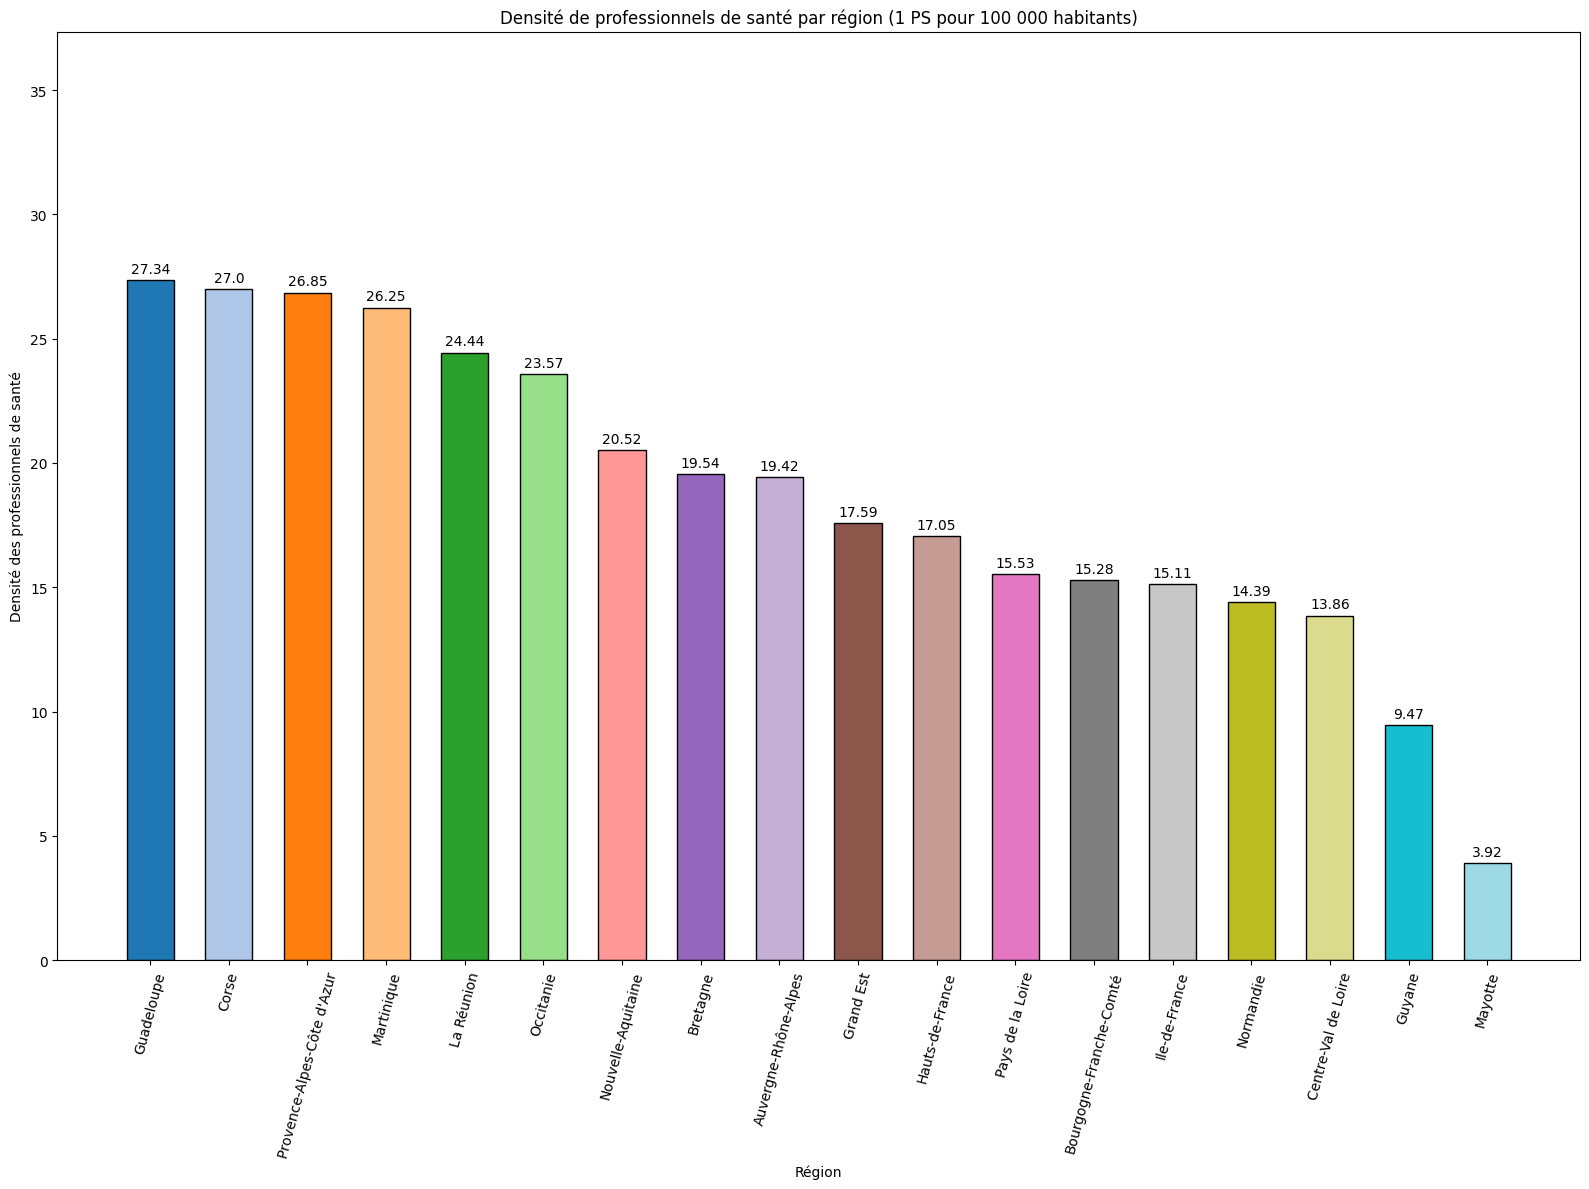

In [40]:

############ Densité des professionnels de santé par région ########################
# Filtrer le dataframe selon les conditions spécifiées
df_densite = df[(df['classe_age'] == 'tout_age') & 
               (df['libelle_sexe'] == 'tout sexe') & 
               (df['departement'] == '999') & 
               (df['libelle_departement'] == 'Tout département')]


# Exclure les professions contenant le mot "ensemble"
df_densite = df_densite[~df_densite['profession_sante'].str.contains("ensemble", case=False, na=False)]


# Compter les effectifs par région
densite_counts = df_densite.groupby('libelle_region')['densite'].mean().round(2)

# Trier les régions par ordre décroissant de la densité
densite_counts = densite_counts.sort_values(ascending=False)

# Largeur des barres
width = 0.6

# Définir une palette de couleurs
colors = plt.cm.tab20(np.linspace(0, 1, len(densite_counts)))

fig, ax = plt.subplots(figsize=(16, 12))

rects = ax.bar(densite_counts.index, densite_counts.values, width, color=colors, edgecolor='black')

# Ajouter des labels en haut des barres
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Ajouter des labels, un titre et des labels pour l'axe x
ax.set_xlabel('Région')
ax.set_ylabel('Densité des professionnels de santé')
ax.set_title('Densité de professionnels de santé par région (1 PS pour 100 000 habitants)')
plt.xticks(rotation=75)
plt.ylim(0, max(densite_counts.values) + 10)  # Ajuster la limite supérieure de l'axe y
    
plt.tight_layout()
plt.show()


/tmp/ipykernel_11805/556760458.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()#ajuster la position pour éviter les chauvechements


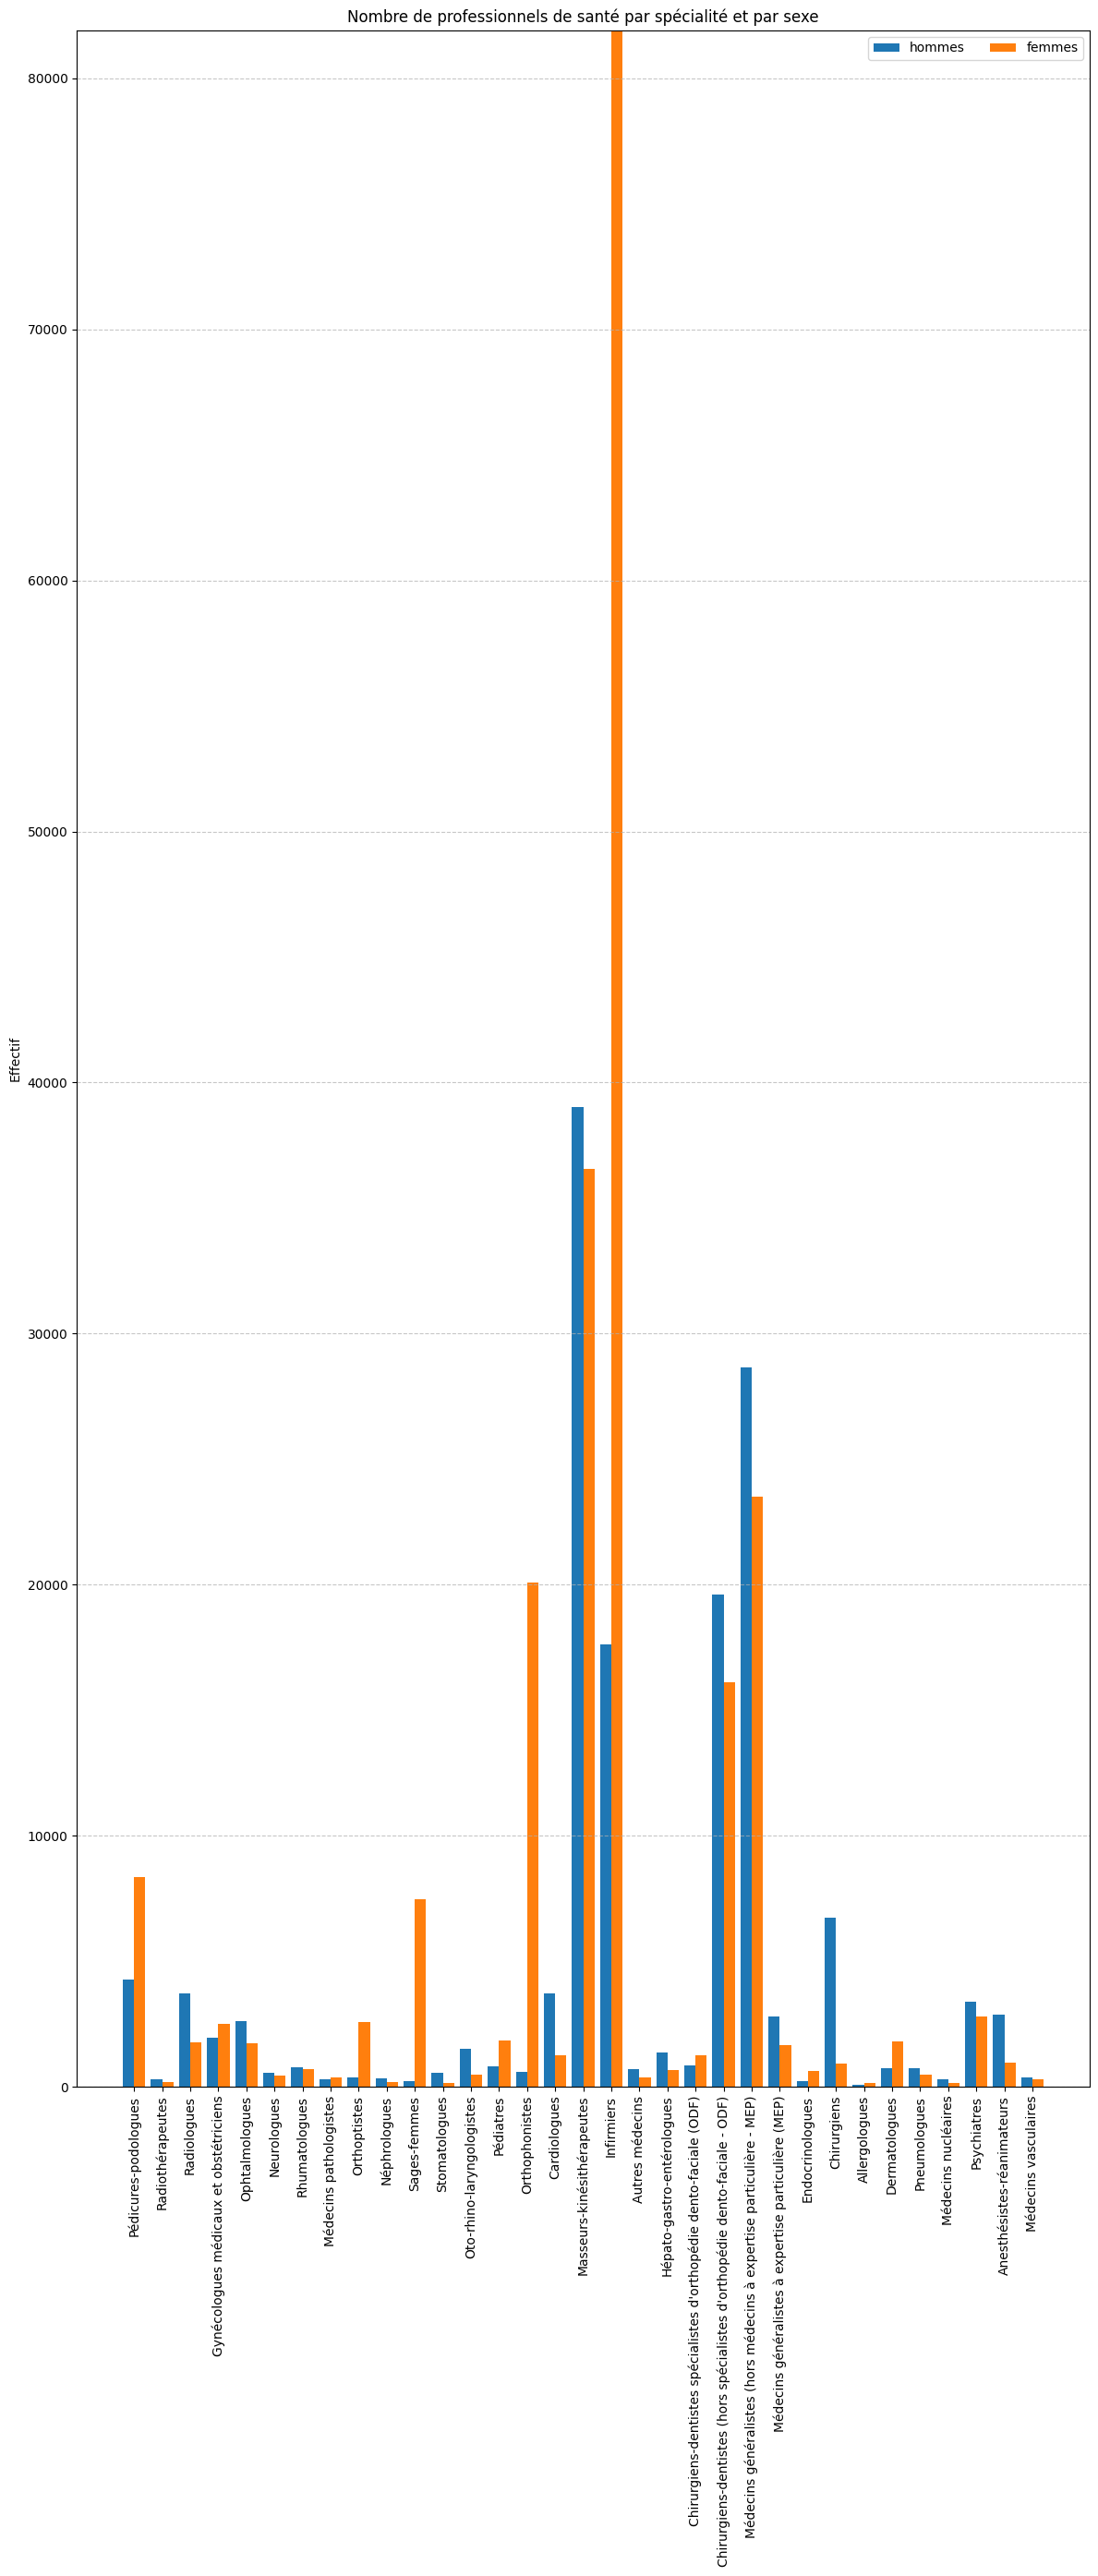

In [41]:

####### Nombre de professionnels de santé par spécialité et par sexe ############
# Obtenir les spécialités uniques
specialties = df_specialite['profession_sante'].unique()

# Initialiser les compteurs pour chaque sexe
sex_counts = {'hommes': [], 'femmes': []}

# Calculer le nombre de professionnels de chaque sexe pour chaque spécialité
for specialty in specialties:
    males = df_specialite[(df_specialite['profession_sante'] == specialty) & (df_specialite['libelle_sexe'] == 'hommes')]['effectif'].sum()
    females = df_specialite[(df_specialite['profession_sante'] == specialty) & (df_specialite['libelle_sexe'] == 'femmes')]['effectif'].sum()
    sex_counts['hommes'].append(males)
    sex_counts['femmes'].append(females)

# Convertir les listes en arrays numpy
sex_counts['hommes'] = np.array(sex_counts['hommes'])
sex_counts['femmes'] = np.array(sex_counts['femmes'])



# Largeur des barres
width = 0.4
x = np.arange(len(specialties))  # Emplacements des labels

fig, ax = plt.subplots(figsize=(12, 28), layout='constrained')
multiplier = 0

for sex, counts in sex_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, counts, width, label=sex)
    #ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Ajouter des labels, un titre et des labels pour l'axe x
ax.set_ylabel('Effectif')
ax.set_title('Nombre de professionnels de santé par spécialité et par sexe')
ax.set_xticks(x + width / 2, specialties)
ax.legend(loc='upper right', ncols=2)
plt.xticks(rotation=90)#rotation des etiquettes profession de la santé
plt.ylim(0, max(max(sex_counts['hommes']), max(sex_counts['femmes'])) + 10)  # Ajuster la limite supérieure de l'axe y
plt.tight_layout()#ajuster la position pour éviter les chauvechements
plt.grid(axis='y', linestyle='--', alpha=0.7) #ajouter une grille pour meilleure lisibilité
plt.show()



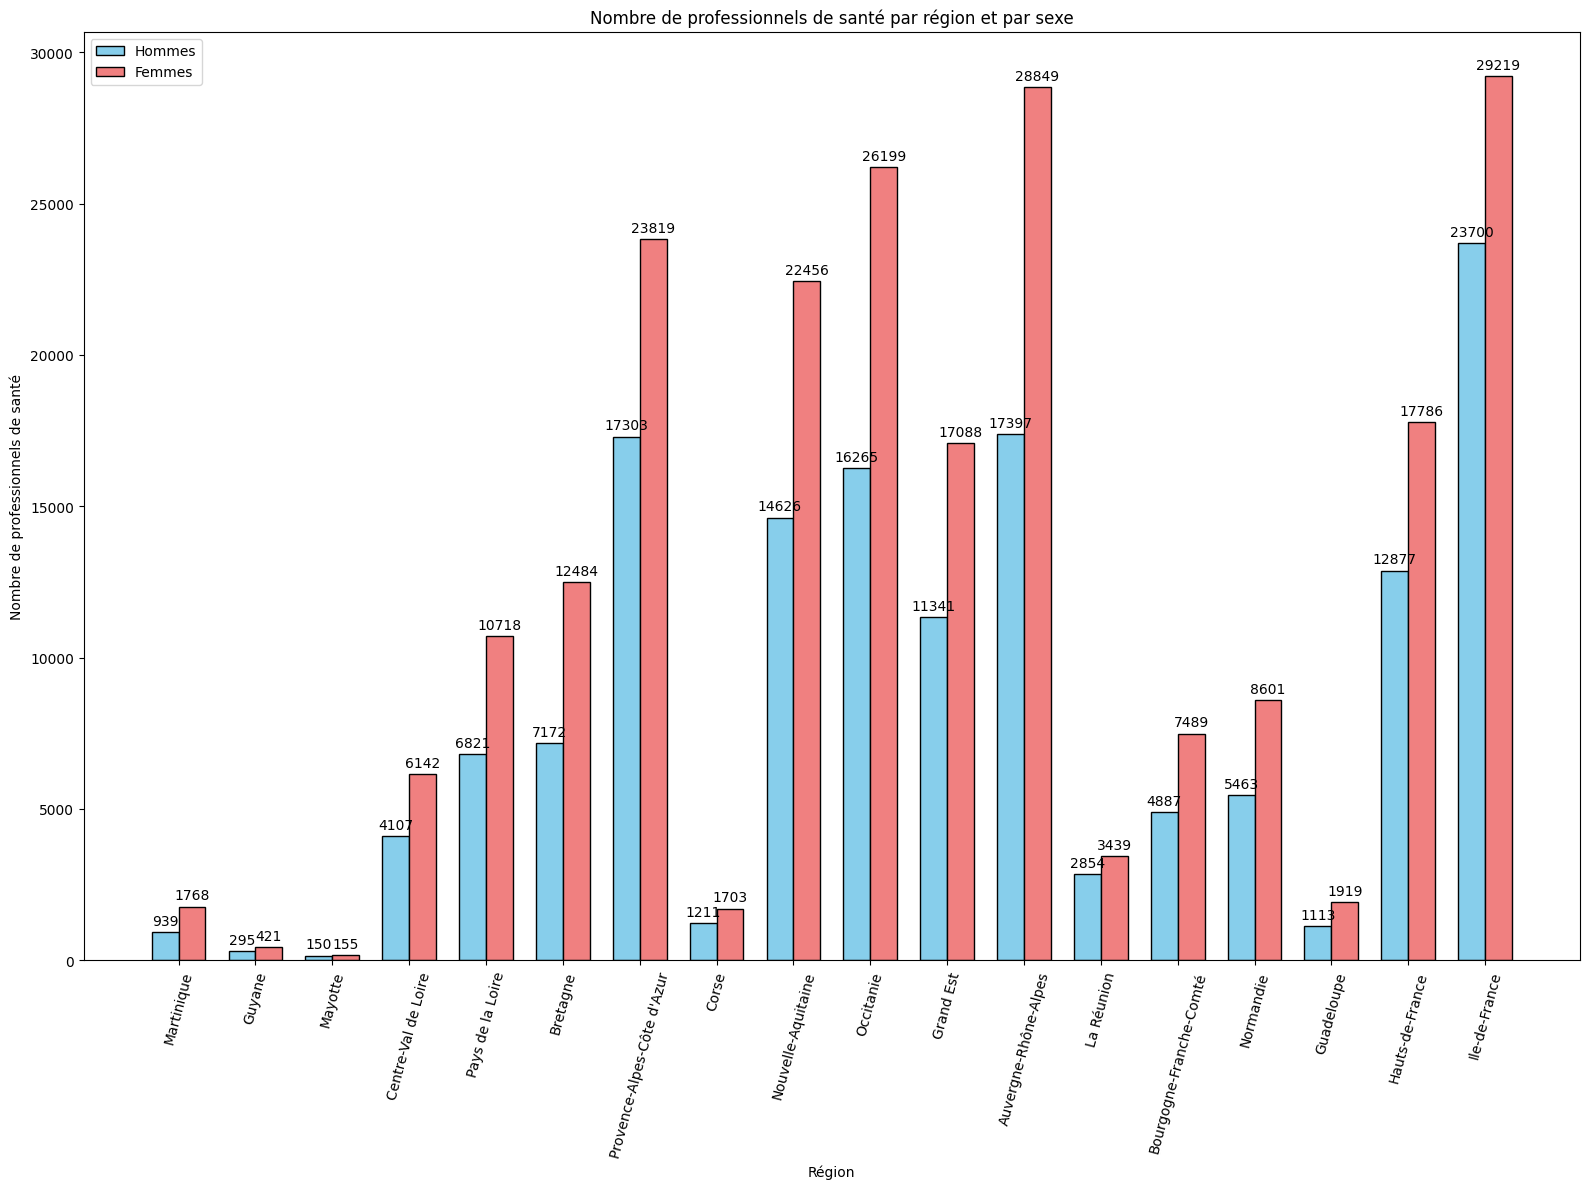

In [42]:

############Nombre de professionnels de santé par région et par sexe ########################
# Filtrer le dataframe selon les conditions spécifiées
df_filtre = df[(df['classe_age'] == 'tout_age') & 
               (df['departement'] == '999') & 
               (df['libelle_departement'] == 'Tout département')]

# Exclure les professions contenant le mot "ensemble"
df_filtre = df_filtre[~df_filtre['profession_sante'].str.contains("ensemble", case=False, na=False)]

# Obtenir les régions uniques
regions = df_filtre['libelle_region'].unique()

# Initialiser les compteurs pour chaque sexe
sex_counts = {'hommes': [], 'femmes': []}

# Calculer le nombre de professionnels de chaque sexe pour chaque région
for region in regions:
    males = df_filtre[(df_filtre['libelle_region'] == region) & (df_filtre['libelle_sexe'] == 'hommes')]['effectif'].sum()
    females = df_filtre[(df_filtre['libelle_region'] == region) & (df_filtre['libelle_sexe'] == 'femmes')]['effectif'].sum()
    sex_counts['hommes'].append(males)
    sex_counts['femmes'].append(females)

# Convertir les listes en arrays numpy
sex_counts['hommes'] = np.array(sex_counts['hommes'])
sex_counts['femmes'] = np.array(sex_counts['femmes'])

# Largeur des barres
width = 0.35


# Créer une palette de couleurs
colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))

fig, ax = plt.subplots(figsize=(16, 12))

# Positions des barres sur l'axe x
x = np.arange(len(regions))

# Barres pour les hommes et les femmes
rects1 = ax.bar(x - width/2, sex_counts['hommes'], width, label='Hommes', color='skyblue', edgecolor='black')
rects2 = ax.bar(x + width/2, sex_counts['femmes'], width, label='Femmes', color='lightcoral', edgecolor='black')

# Ajouter des labels en haut des barres
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Ajouter des labels, un titre et des labels pour l'axe x
ax.set_xlabel('Région')
ax.set_ylabel('Nombre de professionnels de santé')
ax.set_title('Nombre de professionnels de santé par région et par sexe')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=75)
ax.legend()

plt.tight_layout()
plt.show()


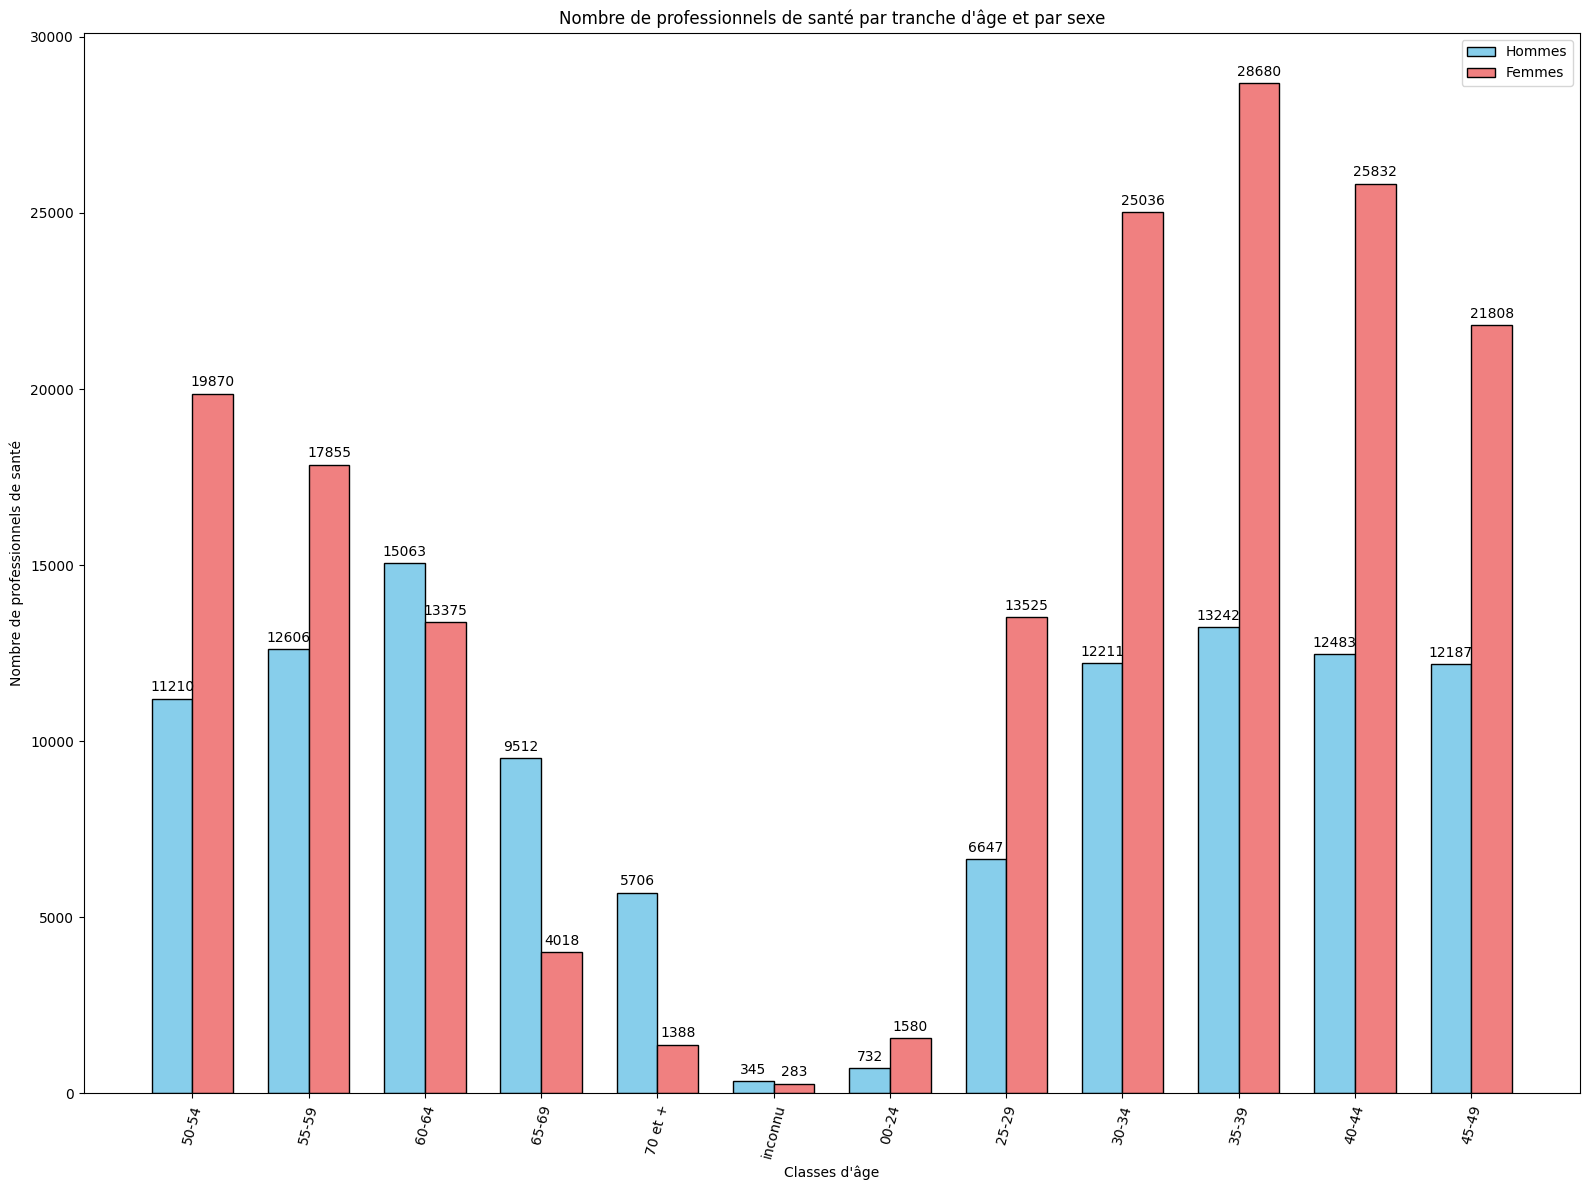

In [43]:

############Nombre de professionnels de santé par tranche d'age et par sexe ########################
# Filtrer le dataframe selon les conditions spécifiées
df_filtre_age = df[(df['departement'] == '999') & 
                   (df['libelle_departement'] == 'Tout département')]

# Exclure les professions contenant le mot "ensemble"
df_filtre_age = df_filtre_age[~df_filtre_age['profession_sante'].str.contains("ensemble", case=False, na=False)]
# Exclure la région 99 (FRANCE) 
df_filtre_age = df_filtre_age[~df_filtre_age['libelle_region'].str.contains("FRANCE", case=False, na=False)]
# Exclure le libelle tout age 
df_filtre_age = df_filtre_age[~df_filtre_age['classe_age'].str.contains("tout_age", case=False, na=False)]

# Obtenir les tranches d'age uniques
ages = df_filtre_age['classe_age'].unique()


# Initialiser les compteurs pour chaque sexe
sex_counts = {'hommes': [], 'femmes': []}

# Calculer le nombre de professionnels de chaque sexe pour chaque tranche d'âge
for age in ages:
    males = df_filtre_age[(df_filtre_age['classe_age'] == age) & (df_filtre_age['libelle_sexe'] == 'hommes')]['effectif'].sum()
    females = df_filtre_age[(df_filtre_age['classe_age'] == age) & (df_filtre_age['libelle_sexe'] == 'femmes')]['effectif'].sum()
    sex_counts['hommes'].append(males)
    sex_counts['femmes'].append(females)

# Convertir les listes en arrays numpy
sex_counts['hommes'] = np.array(sex_counts['hommes'])
sex_counts['femmes'] = np.array(sex_counts['femmes'])

# Largeur des barres
width = 0.35

# Créer une palette de couleurs
colors = plt.cm.tab20(np.linspace(0, 1, len(ages)))

fig, ax = plt.subplots(figsize=(16, 12))

# Positions des barres sur l'axe x
x = np.arange(len(ages))

# Barres pour les hommes et les femmes
rects1 = ax.bar(x - width/2, sex_counts['hommes'], width, label='Hommes', color='skyblue', edgecolor='black')
rects2 = ax.bar(x + width/2, sex_counts['femmes'], width, label='Femmes', color='lightcoral', edgecolor='black')

# Ajouter des labels en haut des barres
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Ajouter des labels, un titre et des labels pour l'axe x
ax.set_xlabel('Classes d\'âge')
ax.set_ylabel('Nombre de professionnels de santé')
ax.set_title('Nombre de professionnels de santé par tranche d\'âge et par sexe')
ax.set_xticks(x)
ax.set_xticklabels(ages, rotation=75)
ax.legend()

plt.tight_layout()
plt.show()


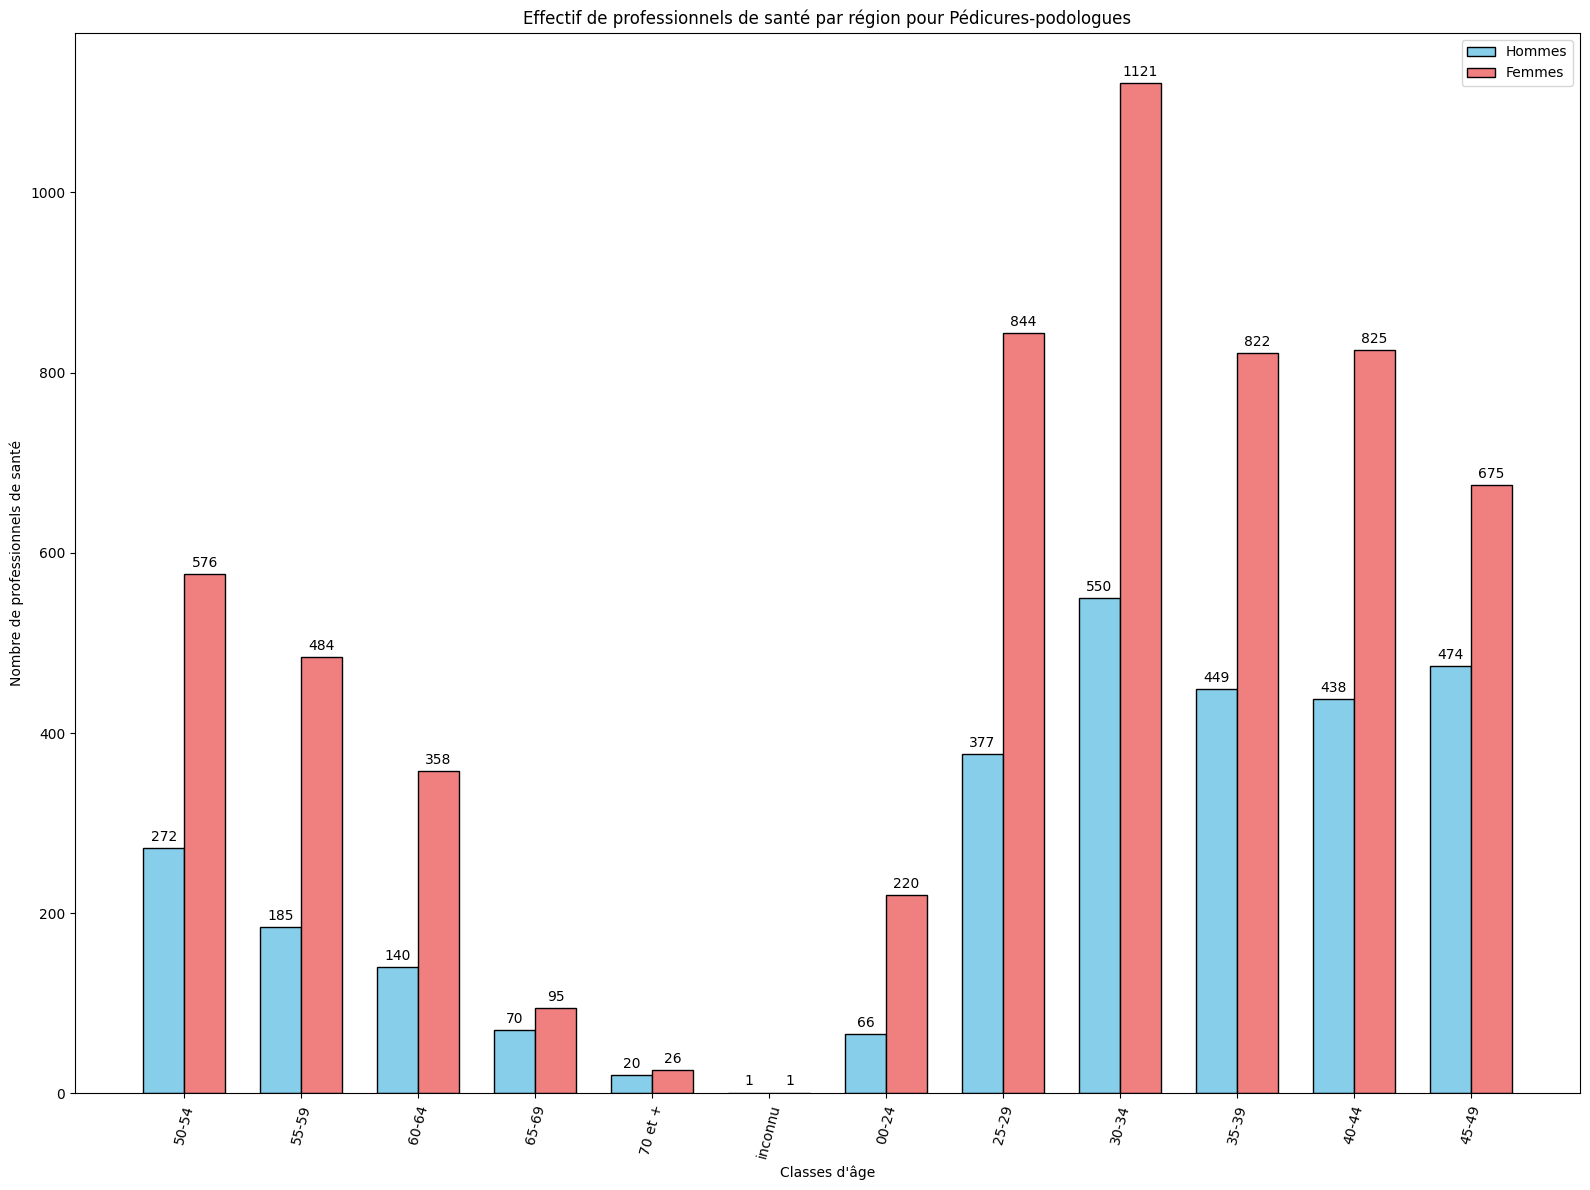

In [44]:
############ DYNAMIQUE / STREAMLIT Effectif des professionnels de santé par région avec selection de la profession de santé ########################
# Fonction pour afficher la densité des professionnels de santé par région en fonction de la profession sélectionnée
def afficher_effectif(profession):
############Nombre de professionnels de santé par tranche d'age et par sexe ########################
    # Filtrer le dataframe selon les conditions spécifiées
    df_filtre_age = df[(df['departement'] == '999') & (df['libelle_departement'] == 'Tout département')]

    # Exclure les professions contenant le mot "ensemble"
    df_filtre_age = df_filtre_age[~df_filtre_age['profession_sante'].str.contains("ensemble", case=False, na=False)]
    # Exclure la région 99 (FRANCE) 
    df_filtre_age = df_filtre_age[~df_filtre_age['libelle_region'].str.contains("FRANCE", case=False, na=False)]
    # Exclure le libelle tout age 
    df_filtre_age = df_filtre_age[~df_filtre_age['classe_age'].str.contains("tout_age", case=False, na=False)]

    # Obtenir les tranches d'age uniques
    ages = df_filtre_age['classe_age'].unique()

    # Filtrer selon la profession sélectionnée
    df_filtre_age = df_filtre_age[df_filtre_age['profession_sante'] == profession]


    # Initialiser les compteurs pour chaque sexe
    sex_counts = {'hommes': [], 'femmes': []}

    # Calculer le nombre de professionnels de chaque sexe pour chaque tranche d'âge
    for age in ages:
        males = df_filtre_age[(df_filtre_age['classe_age'] == age) & (df_filtre_age['libelle_sexe'] == 'hommes')]['effectif'].sum()
        females = df_filtre_age[(df_filtre_age['classe_age'] == age) & (df_filtre_age['libelle_sexe'] == 'femmes')]['effectif'].sum()
        sex_counts['hommes'].append(males)
        sex_counts['femmes'].append(females)

    # Convertir les listes en arrays numpy
    sex_counts['hommes'] = np.array(sex_counts['hommes'])
    sex_counts['femmes'] = np.array(sex_counts['femmes'])

    # Largeur des barres
    width = 0.35

    # Créer une palette de couleurs
    colors = plt.cm.tab20(np.linspace(0, 1, len(ages)))

    fig, ax = plt.subplots(figsize=(16, 12))

    # Positions des barres sur l'axe x
    x = np.arange(len(ages))

    # Barres pour les hommes et les femmes
    rects1 = ax.bar(x - width/2, sex_counts['hommes'], width, label='Hommes', color='skyblue', edgecolor='black')
    rects2 = ax.bar(x + width/2, sex_counts['femmes'], width, label='Femmes', color='lightcoral', edgecolor='black')

    # Ajouter des labels en haut des barres
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Ajouter des labels, un titre et des labels pour l'axe x
    ax.set_xlabel('Classes d\'âge')
    ax.set_ylabel('Nombre de professionnels de santé')
    ax.set_title('Effectif de professionnels de santé par région pour {}'.format(profession))
    ax.set_xticks(x)
    ax.set_xticklabels(ages, rotation=75)
    ax.legend()

    plt.tight_layout()
    plt.show()

    st.pyplot(fig)

# Titre de l'application
st.title("Effectif des professionnels de santé par région")

# Sélection de la profession de santé
professions = df['profession_sante'].unique()
profession_age = st.selectbox("Sélectionnez la profession de santé :", professions)

# Afficher la densité pour la profession sélectionnée
if profession_age:
    afficher_effectif(profession_age)



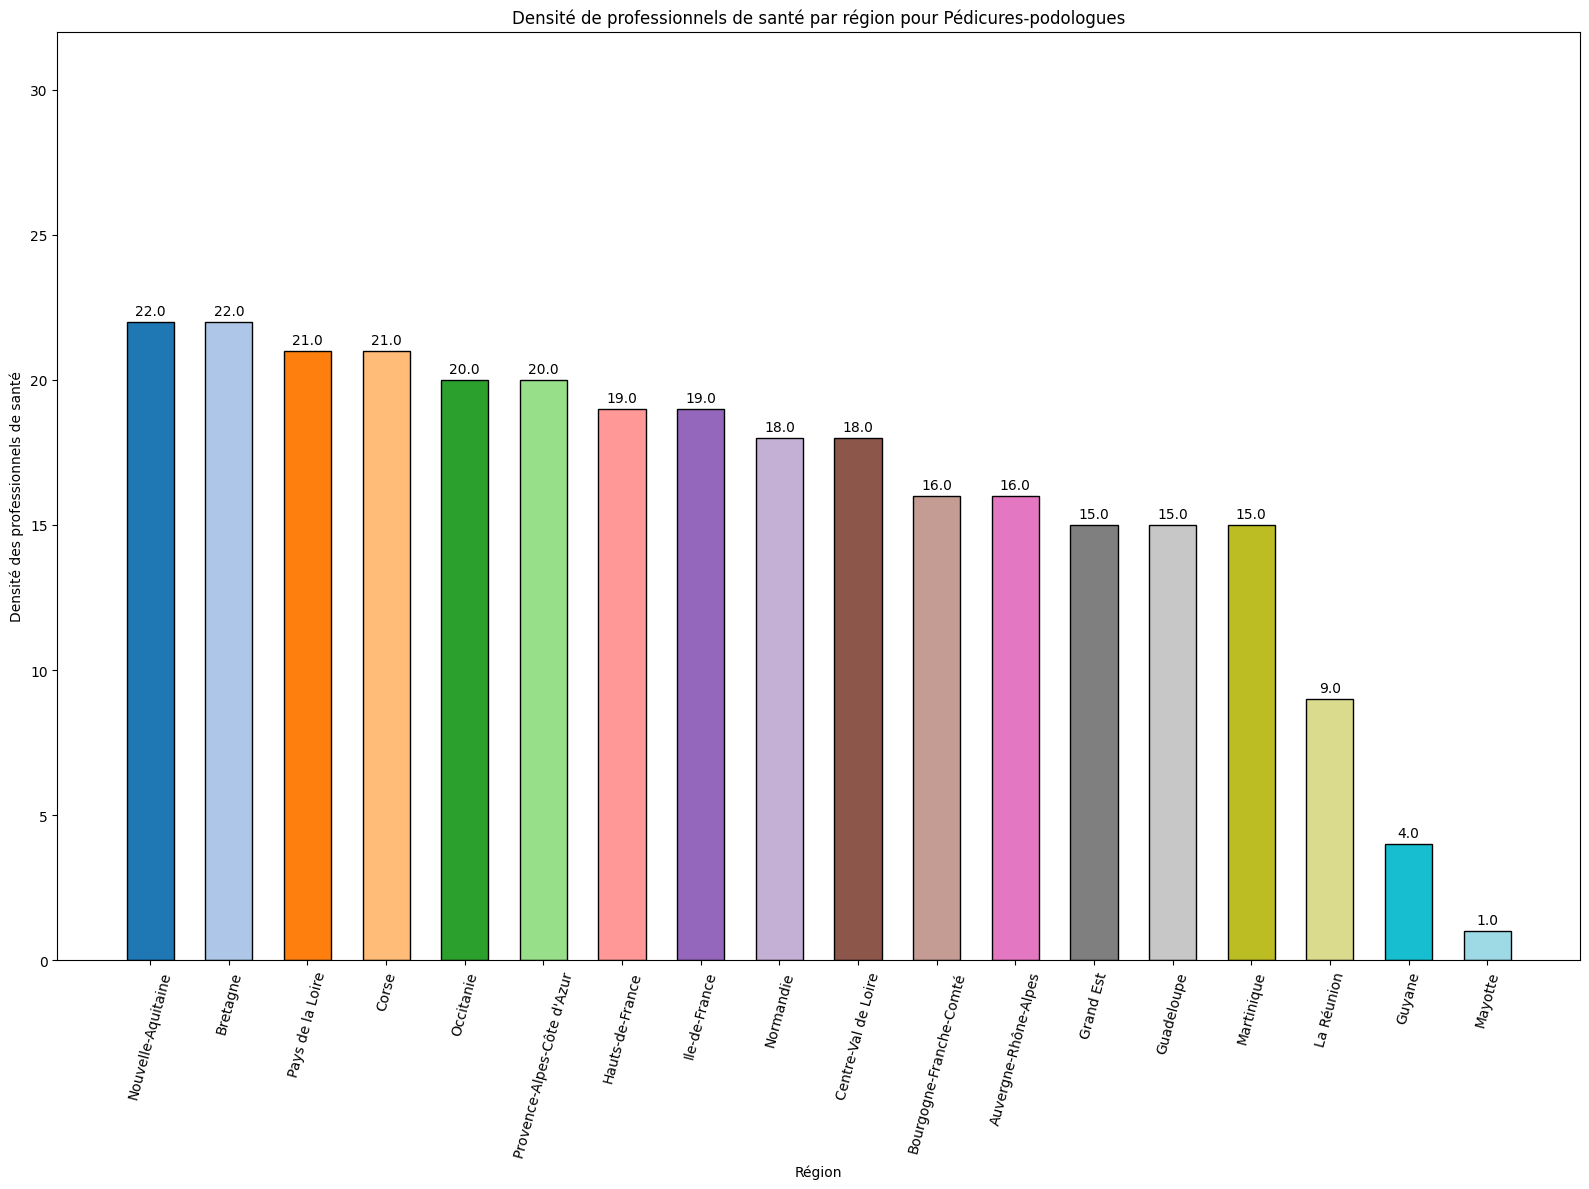

In [45]:


############ DYNAMIQUE / STREAMLIT Densité des professionnels de santé par région avec selection de la profession de santé ########################
# Fonction pour afficher la densité des professionnels de santé par région en fonction de la profession sélectionnée
def afficher_densite(profession):
    # Filtrer le dataframe selon les conditions spécifiées
    df_densite = df[(df['classe_age'] == 'tout_age') & 
                   (df['libelle_sexe'] == 'tout sexe') & 
                   (df['departement'] == '999') & 
                   (df['libelle_departement'] == 'Tout département')]

    # Exclure les professions contenant le mot "ensemble"
    df_densite = df_densite[~df_densite['profession_sante'].str.contains("ensemble", case=False, na=False)]

    # Filtrer selon la profession sélectionnée
    df_densite = df_densite[df_densite['profession_sante'] == profession]

    # Compter les effectifs par région
    densite_counts = df_densite.groupby('libelle_region')['densite'].mean().round(2)

    # Trier les régions par ordre décroissant de la densité
    densite_counts = densite_counts.sort_values(ascending=False)

    # Largeur des barres
    width = 0.6

    # Définir une palette de couleurs
    colors = plt.cm.tab20(np.linspace(0, 1, len(densite_counts)))

    fig, ax = plt.subplots(figsize=(16, 12))

    rects = ax.bar(densite_counts.index, densite_counts.values, width, color=colors, edgecolor='black')

    # Ajouter des labels en haut des barres
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Ajouter des labels, un titre et des labels pour l'axe x
    ax.set_xlabel('Région')
    ax.set_ylabel('Densité des professionnels de santé')
    ax.set_title('Densité de professionnels de santé par région pour {}'.format(profession))
    plt.xticks(rotation=75)
    plt.ylim(0, max(densite_counts.values) + 10)  # Ajuster la limite supérieure de l'axe y

    plt.tight_layout()
    plt.show()

    st.pyplot(fig)

# Titre de l'application
st.title("Densité des professionnels de santé par région")

# Sélection de la profession de santé
professions = df['profession_sante'].unique()
selected_profession = st.selectbox("Sélectionnez la profession de santé :", professions)

# Afficher la densité pour la profession sélectionnée
if selected_profession:
    afficher_densite(selected_profession)
